<a href="https://colab.research.google.com/github/LavanyaSrini/NLP/blob/master/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB Dataset Training and Classification

In [ ]:
import tensorflow as tf

print(tf.__version__)


2.2.0


In [ ]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews", with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX1NY8V/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX1NY8V/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX1NY8V/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np
import tensorflow as tf


train_data, test_data= imdb['train'],imdb['test']
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)   
testing_labels_final =np.array(testing_labels)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(10000,oov_token='oov_tok')
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen= 100, padding='post', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= 100, padding='post', truncating='post')


Testing with GlobalAveragePooling1D

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5610 - accuracy: 0.7384 - val_loss: 0.4349 - val_accuracy: 0.8059
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3478 - accuracy: 0.8553 - val_loss: 0.3937 - val_accuracy: 0.8213
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2851 - accuracy: 0.8835 - val_loss: 0.3971 - val_accuracy: 0.8214
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2485 - accuracy: 0.9017 - val_loss: 0.4189 - val_accuracy: 0.8192
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2217 - accuracy: 0.9136 - val_loss: 0.4491 - val_accuracy: 0.8143
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2009 - accuracy: 0.9242 - val_loss: 0.4804 - val_accuracy: 0.8066
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1839 - accuracy: 0.9327 - val_loss: 0.5151 - val_accuracy: 0.8046
Epoch 

Testing with Flatten layer

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 9606      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 169,613
Trainable params: 169,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5130 - accuracy: 0.7272 - val_loss: 0.4092 - val_accuracy: 0.8111
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2661 - accuracy: 0.8942 - val_loss: 0.4326 - val_accuracy: 0.8063
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1130 - accuracy: 0.9688 - val_loss: 0.5366 - val_accuracy: 0.7937
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0291 - accuracy: 0.9960 - val_loss: 0.6623 - val_accuracy: 0.7890
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 0.7517 - val_accuracy: 0.7880
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.8051 - val_accuracy: 0.7929
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 9.7198e-04 - accuracy: 1.0000 - val_loss: 0.8696 - val_accuracy: 0.7919
Ep

In [ ]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
reverse_word_index=dict([(value,key)for key,value in word_index.items()])

In [ ]:
import io
out_v= io.open('vecs.tsv','w', encoding='utf-8')
out_m= io.open('meta.tsv','w',encoding='utf-8')
for word_num in range (1,10000):
  word=reverse_word_index[word_num]
  embeddings=weights[word_num]
  out_m.write(word+"\n")
  out_v.write('\t'.join([str(x) for x in embeddings])+"\n")
out_v.close
out_m.close

<function TextIOWrapper.close>

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sarcasm Dataset

In [ ]:
import json
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



datastore = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')
print(datastore.text[0:450])
sentences = []
labels = []
urls = []

for item in datastore.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

tokenizer=Tokenizer(oov_token="<00v>")
tokenizer.fit_on_texts(sentences)
word_index =tokenizer.word_index
#print(word_index)
Seq=tokenizer.texts_to_sequences(sentences)
padded=pad_sequences(Seq , padding='post')
print(Seq[0])
print(padded[0])
print(padded.shape)

[
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0},
[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [ ]:
training_size = round(len(sentences) * .75)
print(training_size)
print(len(sentences))

20032
26709


In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(10000,oov_token='oov_tok')
tokenizer.fit_on_texts(training_sentences)

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen= 100, padding='post', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= 100, padding='post', truncating='post')

In [ ]:
import tensorflow as tf
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
# Training the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
626/626 - 2s - loss: 0.6771 - accuracy: 0.5623 - val_loss: 0.6362 - val_accuracy: 0.5866
Epoch 2/30
626/626 - 2s - loss: 0.4875 - accuracy: 0.7987 - val_loss: 0.4069 - val_accuracy: 0.8299
Epoch 3/30
626/626 - 2s - loss: 0.3344 - accuracy: 0.8678 - val_loss: 0.3615 - val_accuracy: 0.8501
Epoch 4/30
626/626 - 2s - loss: 0.2782 - accuracy: 0.8913 - val_loss: 0.3501 - val_accuracy: 0.8495
Epoch 5/30
626/626 - 2s - loss: 0.2400 - accuracy: 0.9066 - val_loss: 0.3408 - val_accuracy: 0.8567
Epoch 6/30
626/626 - 2s - loss: 0.2128 - accuracy: 0.9173 - val_loss: 0.3434 - val_accuracy: 0.8556
Epoch 7/30
626/626 - 2s - loss: 0.1910 - accuracy: 0.9271 - val_loss: 0.3505 - val_accuracy: 0.8544
Epoch 8/30
626/626 - 2s - loss: 0.1704 - accuracy: 0.9375 - val_loss: 0.3631 - val_accuracy: 0.8562
Epoch 9/30
626/626 - 2s - loss: 0.1554 - accuracy: 0.9435 - val_loss: 0.3725 - val_accuracy: 0.8571
Epoch 10/30
626/626 - 2s - loss: 0.1415 - accuracy: 0.9493 - val_loss: 0.3967 - val_accuracy: 0.8507

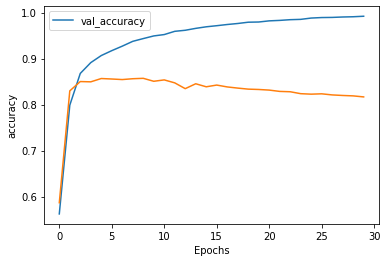

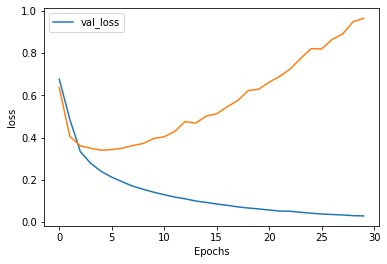

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")



Training and Testing subwords

In [3]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews/subwords8k", with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKRZEJ1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKRZEJ1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKRZEJ1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data=imdb['train'], imdb['test']

In [5]:
train_data

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [6]:
test_data

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [7]:
train_data, test_data=imdb['train'], imdb['test']
tokenizer=info.features['text'].encoder
print(tokenizer.subwords)


['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [8]:
sample_string= 'Tensorflow,from basics to mastery'
tokenizer_string=tokenizer.encode(sample_string)
print(tokenizer_string)


[6307, 2327, 2934, 7973, 48, 4249, 4429, 7, 2652, 8050]


In [9]:
for ts in tokenizer_string:
  print('{}---{}'.format(ts,tokenizer.decode([ts])))

6307---Ten
2327---sor
2934---flow
7973---,
48---from 
4249---basi
4429---cs 
7---to 
2652---master
8050---y


In [10]:
tokenizer_destring=tokenizer.decode(tokenizer_string)
print(tokenizer_destring)


Tensorflow,from basics to mastery


In [11]:
import tensorflow as tf
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________
